# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [13]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [14]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ('Series is :\n',xs,'\n')
print ('Indexes are: ',xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n') # xs.values returns a np.array
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

Series is :
 a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Indexes are:  Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [15]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [16]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [10]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]  #remove first and remove last item, then sum

a         NaN
b    2.591369
c    0.419332
d   -2.886346
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [11]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

# generating time series by increasing one of the quantities in the date
days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [85]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [86]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    11.332638
2018-11-20 14:45:00     8.477920
2018-11-21 14:45:00     9.798364
2018-11-22 14:45:00    11.338602
Freq: D, dtype: float64 

2018-11-19 14:45:00    11.332638
2018-11-20 14:45:00     8.477920
2018-11-21 14:45:00     9.798364
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [87]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [18]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,1.857627,-1.032113,1.208076,-0.844876
2018-11-19 15:45:00,3.102064,1.507813,-0.513466,0.774446
2018-11-19 16:45:00,0.027142,-1.282033,0.537609,-1.599070
2018-11-19 17:45:00,1.109051,-0.204993,0.670282,1.530764
2018-11-19 18:45:00,1.905017,0.677963,3.032287,-0.062711
2018-11-19 19:45:00,-1.308617,0.063459,1.460871,-1.353989
2018-11-19 20:45:00,-0.096320,1.035734,1.964680,-0.629759
2018-11-19 21:45:00,2.913803,-0.323408,1.243657,-0.119831
2018-11-19 22:45:00,-1.348281,-1.340431,0.527400,0.310268
2018-11-19 23:45:00,0.024029,-1.225629,-0.840698,1.761120


or by means of a dictionary:


In [89]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [90]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [91]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,1.808886,0.598369,-0.540464,0.325688
2018-11-19 15:45:00,-0.665028,-0.689998,0.249879,-0.356551
2018-11-19 16:45:00,0.061752,-0.572238,-0.622864,-1.892609
2018-11-19 17:45:00,0.909872,-0.925476,-0.620103,0.554621
2018-11-19 18:45:00,-0.961207,0.253615,1.166016,0.875704


In [92]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-0.476388,0.194679,1.126965,0.811778
2018-11-19 21:45:00,-0.998629,0.544825,-0.186842,-1.157319
2018-11-19 22:45:00,0.831964,-0.299087,-0.722319,0.923748
2018-11-19 23:45:00,1.160444,0.044246,-2.107890,1.466178


In [93]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [94]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [95]:
df.values

array([[ 1.80888605,  0.59836872, -0.54046365,  0.32568753],
       [-0.6650279 , -0.68999821,  0.24987927, -0.3565508 ],
       [ 0.06175237, -0.5722384 , -0.62286399, -1.89260934],
       [ 0.90987212, -0.92547624, -0.62010258,  0.5546205 ],
       [-0.96120693,  0.25361518,  1.1660161 ,  0.87570351],
       [ 2.29634243,  0.7534155 , -0.97050704,  0.70229351],
       [-0.47638845,  0.19467907,  1.12696463,  0.81177791],
       [-0.99862928,  0.54482528, -0.18684218, -1.15731891],
       [ 0.83196359, -0.29908694, -0.72231945,  0.92374782],
       [ 1.16044401,  0.04424645, -2.10789041,  1.46617814]])

In [96]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.396801,-0.009765,-0.322813,0.225353
std,1.175283,0.584547,0.980721,1.047556
min,-0.998629,-0.925476,-2.107890,-1.892609
25%,-0.617868,-0.503951,-0.697456,-0.185991
50%,0.446858,0.119463,-0.580283,0.628457
75%,1.097801,0.472023,0.140699,0.859722
max,2.296342,0.753416,1.166016,1.466178


In [97]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,1.808886,-0.665028,0.061752,0.909872,-0.961207,2.296342,-0.476388,-0.998629,0.831964,1.160444
B,0.598369,-0.689998,-0.572238,-0.925476,0.253615,0.753416,0.194679,0.544825,-0.299087,0.044246
C,-0.540464,0.249879,-0.622864,-0.620103,1.166016,-0.970507,1.126965,-0.186842,-0.722319,-2.107890
D,0.325688,-0.356551,-1.892609,0.554621,0.875704,0.702294,0.811778,-1.157319,0.923748,1.466178


In [98]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,0.325688,-0.540464,0.598369,1.808886
2018-11-19 15:45:00,-0.356551,0.249879,-0.689998,-0.665028
2018-11-19 16:45:00,-1.892609,-0.622864,-0.572238,0.061752
2018-11-19 17:45:00,0.554621,-0.620103,-0.925476,0.909872
2018-11-19 18:45:00,0.875704,1.166016,0.253615,-0.961207
2018-11-19 19:45:00,0.702294,-0.970507,0.753416,2.296342
2018-11-19 20:45:00,0.811778,1.126965,0.194679,-0.476388
2018-11-19 21:45:00,-1.157319,-0.186842,0.544825,-0.998629
2018-11-19 22:45:00,0.923748,-0.722319,-0.299087,0.831964
2018-11-19 23:45:00,1.466178,-2.107890,0.044246,1.160444


In [99]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 23:45:00,1.160444,0.044246,-2.107890,1.466178
2018-11-19 19:45:00,2.296342,0.753416,-0.970507,0.702294
2018-11-19 22:45:00,0.831964,-0.299087,-0.722319,0.923748
2018-11-19 16:45:00,0.061752,-0.572238,-0.622864,-1.892609
2018-11-19 17:45:00,0.909872,-0.925476,-0.620103,0.554621
2018-11-19 14:45:00,1.808886,0.598369,-0.540464,0.325688
2018-11-19 21:45:00,-0.998629,0.544825,-0.186842,-1.157319
2018-11-19 15:45:00,-0.665028,-0.689998,0.249879,-0.356551
2018-11-19 20:45:00,-0.476388,0.194679,1.126965,0.811778
2018-11-19 18:45:00,-0.961207,0.253615,1.166016,0.875704


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [100]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00    1.808886
2018-11-19 15:45:00   -0.665028
2018-11-19 16:45:00    0.061752
2018-11-19 17:45:00    0.909872
2018-11-19 18:45:00   -0.961207
2018-11-19 19:45:00    2.296342
2018-11-19 20:45:00   -0.476388
2018-11-19 21:45:00   -0.998629
2018-11-19 22:45:00    0.831964
2018-11-19 23:45:00    1.160444
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00    1.808886
2018-11-19 15:45:00   -0.665028
2018-11-19 16:45:00    0.061752
2018-11-19 17:45:00    0.909872
2018-11-19 18:45:00   -0.961207
2018-11-19 19:45:00    2.296342
2018-11-19 20:45:00   -0.476388
2018-11-19 21:45:00   -0.998629
2018-11-19 22:45:00    0.831964
2018-11-19 23:45:00    1.160444
Freq: H, Name: A, dtype: float64


In [101]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00  1.808886  0.598369 -0.540464  0.325688
2018-11-19 15:45:00 -0.665028 -0.689998  0.249879 -0.356551
2018-11-19 16:45:00  0.061752 -0.572238 -0.622864 -1.892609
                            A         B         C         D
2018-11-19 14:45:00  1.808886  0.598369 -0.540464  0.325688
2018-11-19 15:45:00 -0.665028 -0.689998  0.249879 -0.356551
2018-11-19 16:45:00  0.061752 -0.572238 -0.622864 -1.892609


### Selection by label

In [102]:
# getting a cross section (part of the DataFrame) using a label
print(df.loc[dates[0]]) #returns a series (because it is a single row)
print("\n",df[:1])      #returns a dataframe

#difference between df[0] and df.loc[dates[0]]
print("\n",type(df[:1]), type(df.loc[dates[0]]))

A    1.808886
B    0.598369
C   -0.540464
D    0.325688
Name: 2018-11-19 14:45:00, dtype: float64

                             A         B         C         D
2018-11-19 14:45:00  1.808886  0.598369 -0.540464  0.325688

 <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [103]:
# selecting on a multi-axis by label:
print(df.loc[:,['A','B']])  #returns a dataframe (because there are multiple times)
print(type(df.loc[:,['A','B']]))
print(type(df.loc[:,'A']))

                            A         B
2018-11-19 14:45:00  1.808886  0.598369
2018-11-19 15:45:00 -0.665028 -0.689998
2018-11-19 16:45:00  0.061752 -0.572238
2018-11-19 17:45:00  0.909872 -0.925476
2018-11-19 18:45:00 -0.961207  0.253615
2018-11-19 19:45:00  2.296342  0.753416
2018-11-19 20:45:00 -0.476388  0.194679
2018-11-19 21:45:00 -0.998629  0.544825
2018-11-19 22:45:00  0.831964 -0.299087
2018-11-19 23:45:00  1.160444  0.044246
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [104]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,-0.961207,0.253615
2018-11-19 19:45:00,2.296342,0.753416
2018-11-19 20:45:00,-0.476388,0.194679


In [105]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.6650278967816408
-0.6650278967816408


### Selecting by position

In [106]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# NOTATION SIMILAR TO NUMPY AND PYTHON
print (df.iloc[3:5,0:2])

A    0.909872
B   -0.925476
C   -0.620103
D    0.554621
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00  0.909872 -0.925476
2018-11-19 18:45:00 -0.961207  0.253615


In [107]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,-0.665028,0.249879
2018-11-19 16:45:00,0.061752,-0.622864
2018-11-19 18:45:00,-0.961207,1.166016


In [108]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00 -0.665028 -0.689998  0.249879 -0.356551
2018-11-19 16:45:00  0.061752 -0.572238 -0.622864 -1.892609 

                            B         C
2018-11-19 14:45:00  0.598369 -0.540464
2018-11-19 15:45:00 -0.689998  0.249879
2018-11-19 16:45:00 -0.572238 -0.622864
2018-11-19 17:45:00 -0.925476 -0.620103
2018-11-19 18:45:00  0.253615  1.166016
2018-11-19 19:45:00  0.753416 -0.970507
2018-11-19 20:45:00  0.194679  1.126965
2018-11-19 21:45:00  0.544825 -0.186842
2018-11-19 22:45:00 -0.299087 -0.722319
2018-11-19 23:45:00  0.044246 -2.107890


In [109]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.6899982083459486

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [26]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 15:45:00,3.102064,1.507813,-0.513466,0.774446
2018-11-19 18:45:00,1.905017,0.677963,3.032287,-0.062711
2018-11-19 19:45:00,-1.308617,0.063459,1.460871,-1.353989
2018-11-19 20:45:00,-0.096320,1.035734,1.964680,-0.629759


In [111]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,1.808886,0.598369,NaN,0.325688
2018-11-19 15:45:00,NaN,NaN,0.249879,NaN
2018-11-19 16:45:00,0.061752,NaN,NaN,NaN
2018-11-19 17:45:00,0.909872,NaN,NaN,0.554621
2018-11-19 18:45:00,NaN,0.253615,1.166016,0.875704
2018-11-19 19:45:00,2.296342,0.753416,NaN,0.702294
2018-11-19 20:45:00,NaN,0.194679,1.126965,0.811778
2018-11-19 21:45:00,NaN,0.544825,NaN,NaN
2018-11-19 22:45:00,0.831964,NaN,NaN,0.923748
2018-11-19 23:45:00,1.160444,0.044246,NaN,1.466178


### Setting

Combination of selection and setting of values

In [112]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [113]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.598369,-0.540464,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.665028,-0.689998,0.249879,5,0.5,2,0.999962
2018-11-19 16:45:00,0.061752,-0.572238,-0.622864,5,1.0,4,0.999848
2018-11-19 17:45:00,0.909872,-0.925476,-0.620103,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.961207,0.253615,1.166016,5,2.0,8,0.999391
2018-11-19 19:45:00,2.296342,0.753416,-0.970507,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.476388,0.194679,1.126965,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.998629,0.544825,-0.186842,5,3.5,14,0.998135
2018-11-19 22:45:00,0.831964,-0.299087,-0.722319,5,4.0,16,0.997564
2018-11-19 23:45:00,1.160444,0.044246,-2.107890,5,4.5,18,0.996917


In [114]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.598369,-0.540464,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.665028,-0.689998,-0.249879,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.061752,-0.572238,-0.622864,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.909872,-0.925476,-0.620103,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.961207,-0.253615,-1.166016,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-2.296342,-0.753416,-0.970507,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.476388,-0.194679,-1.126965,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-0.998629,-0.544825,-0.186842,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.831964,-0.299087,-0.722319,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-1.160444,-0.044246,-2.107890,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [115]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,0.598369,-0.540464,5,0.0,1.000000
2018-11-19 15:45:00,-0.665028,-0.689998,0.249879,5,0.5,0.999962
2018-11-19 16:45:00,0.061752,-0.572238,-0.622864,5,1.0,0.999848
2018-11-19 17:45:00,0.909872,-0.925476,-0.620103,5,1.5,0.999657
2018-11-19 18:45:00,-0.961207,0.253615,1.166016,5,2.0,0.999391
2018-11-19 19:45:00,2.296342,0.753416,-0.970507,5,2.5,0.999048
2018-11-19 20:45:00,-0.476388,0.194679,1.126965,5,3.0,0.998630
2018-11-19 21:45:00,-0.998629,0.544825,-0.186842,5,3.5,0.998135
2018-11-19 22:45:00,0.831964,-0.299087,-0.722319,5,4.0,0.997564
2018-11-19 23:45:00,1.160444,0.044246,-2.107890,5,4.5,0.996917


In [116]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.598369,-0.540464,5,0.0,0,1.000000
2018-11-19 19:45:00,2.296342,0.753416,-0.970507,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.476388,0.194679,1.126965,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.998629,0.544825,-0.186842,5,3.5,14,0.998135
2018-11-19 22:45:00,0.831964,-0.299087,-0.722319,5,4.0,16,0.997564
2018-11-19 23:45:00,1.160444,0.044246,-2.107890,5,4.5,18,0.996917


In [117]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.598369,-0.540464,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.665028,-0.689998,0.249879,5,0.5,2,0.999962
2018-11-19 16:45:00,0.061752,-0.572238,-0.622864,5,1.0,4,0.999848
2018-11-19 17:45:00,0.909872,-0.925476,-0.620103,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.961207,0.253615,1.166016,5,2.0,8,0.999391
2018-11-19 19:45:00,2.296342,0.753416,-0.970507,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.476388,0.194679,1.126965,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.998629,0.544825,-0.186842,5,3.5,14,0.998135
2018-11-19 23:45:00,1.160444,0.044246,-2.107890,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [118]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,0.598369,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,NaN,0.249879,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.061752,NaN,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.909872,NaN,NaN,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,0.253615,1.166016,5,2.0,8.0,0.999391
2018-11-19 19:45:00,2.296342,0.753416,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,NaN,0.194679,1.126965,5,3.0,12.0,0.998630
2018-11-19 21:45:00,NaN,0.544825,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.831964,NaN,NaN,5,4.0,16.0,0.997564
2018-11-19 23:45:00,1.160444,0.044246,NaN,5,4.5,18.0,0.996917


In [119]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [120]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,True,False,True,False,True,True,False
2018-11-19 15:45:00,True,True,False,False,False,False,False
2018-11-19 16:45:00,False,True,True,False,False,False,False
2018-11-19 17:45:00,False,True,True,False,False,False,False
2018-11-19 18:45:00,True,False,False,False,False,False,False
2018-11-19 19:45:00,False,False,True,False,False,False,False
2018-11-19 20:45:00,True,False,False,False,False,False,False
2018-11-19 21:45:00,True,False,True,False,False,False,False
2018-11-19 22:45:00,False,True,True,False,False,False,False
2018-11-19 23:45:00,False,False,True,False,False,False,False


In [121]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.598369,0.000000,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.000000,0.000000,0.249879,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.061752,0.000000,0.000000,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.909872,0.000000,0.000000,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.000000,0.253615,1.166016,5,2.0,8.0,0.999391
2018-11-19 19:45:00,2.296342,0.753416,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.000000,0.194679,1.126965,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.000000,0.544825,0.000000,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.831964,0.000000,0.000000,5,4.0,16.0,0.997564
2018-11-19 23:45:00,1.160444,0.044246,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [122]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,0.598369,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,0.598369,0.249879,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.061752,0.598369,0.249879,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.909872,0.598369,0.249879,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.909872,0.253615,1.166016,5,2.0,8.0,0.999391
2018-11-19 19:45:00,2.296342,0.753416,1.166016,5,2.5,10.0,0.999048
2018-11-19 20:45:00,2.296342,0.194679,1.126965,5,3.0,12.0,0.998630
2018-11-19 21:45:00,2.296342,0.544825,1.126965,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.831964,0.544825,1.126965,5,4.0,16.0,0.997564
2018-11-19 23:45:00,1.160444,0.044246,1.126965,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [123]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.215912
B         -0.009765
C         -0.322813
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.865415
2018-11-19 15:45:00    1.056402
2018-11-19 16:45:00    1.409500
2018-11-19 17:45:00    1.837707
2018-11-19 18:45:00    2.351116
2018-11-19 19:45:00    2.939757
2018-11-19 20:45:00    3.120555
2018-11-19 21:45:00    3.265356
2018-11-19 22:45:00    3.686874
2018-11-19 23:45:00    3.941960
Freq: H, dtype: float64 



In [124]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.598369,-0.540464,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.665028,-0.091629,-0.290584,10,0.5,2,1.999962
2018-11-19 16:45:00,-0.603276,-0.663868,-0.913448,15,1.5,6,2.999810
2018-11-19 17:45:00,0.306597,-1.589344,-1.533551,20,3.0,12,3.999467
2018-11-19 18:45:00,-0.654610,-1.335729,-0.367535,25,5.0,20,4.998858
2018-11-19 19:45:00,1.641732,-0.582313,-1.338042,30,7.5,30,5.997906
2018-11-19 20:45:00,1.165344,-0.387634,-0.211077,35,10.5,42,6.996536
2018-11-19 21:45:00,0.166714,0.157191,-0.397919,40,14.0,56,7.994670
2018-11-19 22:45:00,0.998678,-0.141896,-1.120239,45,18.0,72,8.992234
2018-11-19 23:45:00,2.159122,-0.097650,-3.228129,50,22.5,90,9.989152


In [125]:
df.apply(lambda x: x.max() - x.min())

A           3.294972
B           1.678892
C           3.273907
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [126]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00    0.598369
2018-11-19 15:45:00   -1.355026
2018-11-19 16:45:00   -0.510486
2018-11-19 17:45:00   -0.015604
2018-11-19 18:45:00   -0.707592
2018-11-19 19:45:00    3.049758
2018-11-19 20:45:00   -0.281709
2018-11-19 21:45:00   -0.453804
2018-11-19 22:45:00    0.532877
2018-11-19 23:45:00    1.204690
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [127]:
file_name="raw_data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's know do some operations among (elements of) columns

In [128]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [129]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

KeyboardInterrupt: 

In [130]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [131]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.367535,0.175154,-0.045578,0.915397
1,-0.152728,0.145830,-0.452928,0.105453
2,2.251157,-0.424840,0.021996,0.786823
3,-0.324503,-0.905169,0.211742,-1.290293
4,1.281759,0.257459,0.391753,0.776486
5,-0.270903,1.083114,1.034727,2.272755
6,0.669358,-1.024659,-0.390774,0.317189
7,-0.422111,0.365469,-1.373556,-1.558829
8,-1.040428,-0.317632,0.615890,0.524378
9,1.288854,-0.385932,-0.749356,-0.661172


In [132]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.367535  0.175154 -0.045578  0.915397
 1 -0.152728  0.145830 -0.452928  0.105453
 2  2.251157 -0.424840  0.021996  0.786823,
           0         1         2         3
 3 -0.324503 -0.905169  0.211742 -1.290293
 4  1.281759  0.257459  0.391753  0.776486
 5 -0.270903  1.083114  1.034727  2.272755
 6  0.669358 -1.024659 -0.390774  0.317189,
           0         1         2         3
 7 -0.422111  0.365469 -1.373556 -1.558829
 8 -1.040428 -0.317632  0.615890  0.524378
 9  1.288854 -0.385932 -0.749356 -0.661172]

In [133]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.367535,0.175154,-0.045578,0.915397
1,-0.152728,0.145830,-0.452928,0.105453
2,2.251157,-0.424840,0.021996,0.786823
3,-0.324503,-0.905169,0.211742,-1.290293
4,1.281759,0.257459,0.391753,0.776486
5,-0.270903,1.083114,1.034727,2.272755
6,0.669358,-1.024659,-0.390774,0.317189
7,-0.422111,0.365469,-1.373556,-1.558829
8,-1.040428,-0.317632,0.615890,0.524378
9,1.288854,-0.385932,-0.749356,-0.661172


In [134]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,-1.367535,0.175154,-0.045578,0.915397
1,-0.152728,0.145830,-0.452928,0.105453
2,2.251157,-0.424840,0.021996,0.786823
3,-0.324503,-0.905169,0.211742,-1.290293
4,1.281759,0.257459,0.391753,0.776486
5,-0.270903,1.083114,1.034727,2.272755
6,0.669358,-1.024659,-0.390774,0.317189
7,-0.422111,0.365469,-1.373556,-1.558829
8,-1.040428,-0.317632,0.615890,0.524378
9,1.288854,-0.385932,-0.749356,-0.661172


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [135]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [136]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.451920,0.275133
1,bar,one,0.337862,-0.517635
2,foo,two,0.145024,0.251883
3,bar,three,-0.062555,1.389912
4,foo,two,-0.263770,-0.291017
5,bar,two,1.280044,-0.585025
6,foo,one,1.572994,0.112997
7,foo,three,-0.397488,-0.905398


In [137]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,1.555352,0.287253
foo,-0.395160,-0.556401


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [140]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.063869
       two       1.157695
baz    one      -1.322416
       two       0.601067
foo    one      -0.433354
       two       1.075233
qux    one       0.778488
       two      -0.784925
dtype: float64


In [141]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.337862 -0.517635
    three -0.062555  1.389912
    two    1.280044 -0.585025
foo one    0.121075  0.388130
    three -0.397488 -0.905398
    two   -0.118746 -0.039134

In [142]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.337862
            D   -0.517635
     three  C   -0.062555
            D    1.389912
     two    C    1.280044
            D   -0.585025
foo  one    C    0.121075
            D    0.388130
     three  C   -0.397488
            D   -0.905398
     two    C   -0.118746
            D   -0.039134
dtype: float64

## Plotting

Just a preview, more on the next lab class!

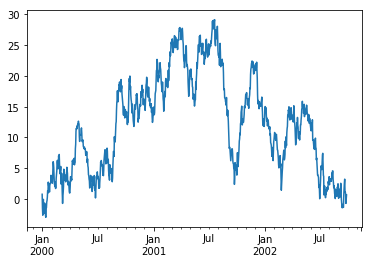

In [143]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

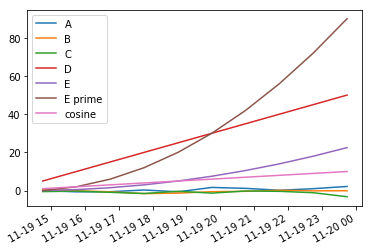

In [144]:
from matplotlib import pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')